# MEASUREMENT PROBLEMS

## Review Of Statics Fundamentals 

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### 1. SAMPLING : It is a representative of the main dataset

In [2]:
population = np.random.randint(0, 80, 10000) # let it represent the ages of people in the neighborhood
population.mean()

39.6935

In [3]:
np.random.seed(115)

In [4]:
sample_set = np.random.choice(a=population, size=100)
sample_set.mean()

38.18

In [6]:
np.random.seed(10)
# '''
#  Reseed the singleton RandomState instance.    
#         Notes
#         -----
#         This is a convenience, legacy function that exists to support
#         older code that uses the singleton RandomState. Best practice
#         is to use a dedicated ``Generator`` instance rather than
#         the random variate generation methods exposed directly in
#         the random module.
# '''

In [8]:
sample_set1 = np.random.choice(a=population, size=100)
sample_set2 = np.random.choice(a=population, size=100)
sample_set3 = np.random.choice(a=population, size=100)
sample_set4 = np.random.choice(a=population, size=100)
sample_set5 = np.random.choice(a=population, size=100)
sample_set6 = np.random.choice(a=population, size=100)
sample_set7 = np.random.choice(a=population, size=100)
sample_set8 = np.random.choice(a=population, size=100)
sample_set9 = np.random.choice(a=population, size=100)
sample_set10 = np.random.choice(a=population, size=100)

In [9]:
(sample_set1.mean() + sample_set2.mean() + sample_set3.mean() + sample_set4.mean() + sample_set5.mean()
 + sample_set6.mean() + sample_set7.mean() + sample_set8.mean() + sample_set9.mean() + sample_set10.mean()) / 10

40.072

### 2.Descriptive Statistics

In [10]:
df = sns.load_dataset("tips")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.00000,19.78594,8.90241,3.07000,13.34750,17.79500,24.12750,50.81000
tip,244.00000,2.99828,1.38364,1.00000,2.00000,2.90000,3.56250,10.00000
size,244.00000,2.56967,0.95110,1.00000,2.00000,2.00000,3.00000,6.00000


### 3.Confidence Intervals

In [11]:
# Confidence Interval Calculation for Numerical Variables in the "Tips" DataSet
# total_bill: total price of the meal (including tip and tax)
# tip: 
# sex: gender of the person paying the fee(0=male, 1=female)
# smoker:Is there anyone in the group who smokes? (0=No, 1=Yes)
# day: (3=Thur, 4=Fri, 5=Sat, 6=Sun)
# time:(0=Day, 1=Night)
# size: How many people are in the group?
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [14]:
sms.DescrStatsW(df["total_bill"]).tconfint_mean() # statsmodels API used in here
# I can say that the average account payable by customers is statistically between 18.66 and 20.90 with 95% confidence,
# and I have a margin of error of 5%.

(18.66333170435847, 20.908553541543164)

In [15]:
sms.DescrStatsW(df["tip"]).tconfint_mean()

(2.8237993062818205, 3.172758070767359)

**Confidence Interval Calculation for Numerical Variables in the "Titanic" DataSet**

In [16]:
df = sns.load_dataset("titanic")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.00000,0.38384,0.48659,0.00000,0.00000,0.00000,1.00000,1.00000
pclass,891.00000,2.30864,0.83607,1.00000,2.00000,3.00000,3.00000,3.00000
age,714.00000,29.69912,14.52650,0.42000,20.12500,28.00000,38.00000,80.00000
sibsp,891.00000,0.52301,1.10274,0.00000,0.00000,0.00000,1.00000,8.00000
parch,891.00000,0.38159,0.80606,0.00000,0.00000,0.00000,0.00000,6.00000
fare,891.00000,32.20421,49.69343,0.00000,7.91040,14.45420,31.00000,512.32920


In [17]:
sms.DescrStatsW(df["age"].dropna()).tconfint_mean()

(28.631790041821507, 30.766445252296133)

In [18]:
sms.DescrStatsW(df["fare"].dropna()).tconfint_mean()

(28.936831234567332, 35.471584702581936)

### 4.Correlation

In [19]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [20]:
df["total_bill"] = df["total_bill"] - df["tip"]

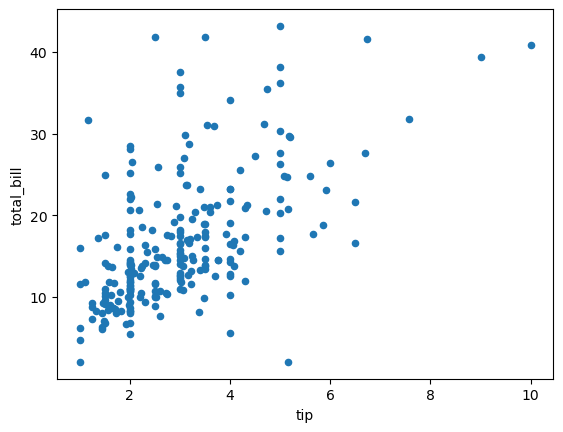

In [21]:
df.plot.scatter("tip", "total_bill")
plt.show()

In [22]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

### 5. AB Testing (Independent Two Sample T Test)
**A represents one group, B represents the other group. It is a method that examines the differences between them.**

**Steps:** <br>
* 1. Set Up Hypotheses
* 2. Assumption Checking
*    2.1. Normality Assumption
*    2.2. Variance Homogeneity
* 3. Application of Hypothesis
*    3.1. If the assumptions are met, independent two-sample t test (parametric test)
*    3.2. If the assumptions are not met, mannwhitneyu test (non-parametric test)
* 4. Comment on results based on p-value

In [23]:
# Note:
# If normality is not achieved, the argument is entered directly at number 2. If normality is achieved but variance homogeneity is not achieved, 
# the argument is entered at number 1.
# It may be useful to perform outlier review and correction before normality review.

#### App1: Is there a statistical difference between the account averages of smokers and non-smokers?

In [24]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [25]:
df.groupby("smoker").agg({"total_bill": "mean"})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12256\2483907789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("smoker").agg({"total_bill": "mean"})


,total_bill
smoker,
Yes,20.75634
No,19.18828


In [26]:
# Step-1
# H0: M1 = M2 (Assumption that there is no difference between the calculation averages)
# H1: M1 != M2

# Step-2
# ---Normality Assumption---
# H0: Normal distribution assumption is met.
# H1: Normal distribution assumption is NOT met.
# shapiro() => The function tests whether the distribution of a test is normal.
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "Yes", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9367, p-value = 0.0002


In [27]:
# p-value < 0.05 =>  H0 DECLINED.
# p-value > 0.05 =>  H0 IRREFUTABLE.
#Test Stat = 0.9367, p-value = 0.0002 => H0 DECLINED, non-parametric will be used.

In [28]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "No", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9045, p-value = 0.0000


In [29]:
# Test Stat = 0.9045, p-value = 0.0000 => H0 DECLINED, non-parametric will be used.

In [30]:
# ---Variance Homogeneity Assumption (levene Test Usage)---
# H0: Variances Are Homogeneous
# H1: Variances Are NOT Homogeneous
# levene() => The fucntion tests whether the distribution of two tests exists.
test_stat, pvalue = levene(df.loc[df["smoker"] == "Yes", "total_bill"],
                           df.loc[df["smoker"] == "No", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 4.0537, p-value = 0.0452


In [31]:
# p-value < 0.05 =>  H0 DECLINED.
# p-value > 0.05 =>  H0 IRREFUTABLE.
#Test Stat = 4.0537, p-value = 0.0452 => H0 DECLINED, Variances Are NOT Homogeneous.

In [33]:
# STEP-3 & STEP-4
# ---If the assumptions are met, independent two-sample t test (parametric test)---
test_stat, pvalue = ttest_ind(df.loc[df["smoker"] == "Yes", "total_bill"],
                              df.loc[df["smoker"] == "No", "total_bill"],
                              equal_var=True)
# If normality and variance homogeneity are ensured, => equal_var=true is entered.
# If normality is achieved but variance homogeneity is not achieved, => equal_var=false is entered. It runs the "welch test" in the background.
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 1.3384, p-value = 0.1820


In [34]:
# p-value < 0.05 =>  H0 DECLINED.
# p-value > 0.05 =>  H0 IRREFUTABLE.
## Test Stat = 1.3384, p-value = 0.1820 => H0 IRREFUTABLE.

In [35]:
# ---If the assumptions are not met, mannwhitneyu test (non-parametric test)---
# mannwhitneyu testi => median values comparison test.
test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"] == "Yes", "total_bill"],
                                 df.loc[df["smoker"] == "No", "total_bill"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 7531.5000, p-value = 0.3413


In [36]:
# p-value < 0.05 =>  H0 DECLINED.
# p-value > 0.05 =>  H0 IRREFUTABLE.
## Test Stat = 7531.5000, p-value = 0.3413 => H0 IRREFUTABLE.

In [37]:
# IMPORTANT NOTE: We know the mistake we will make by rejecting H0 [alpha value (p-value)] but
# We don't know the mistake to make by accepting H1.
# Therefore, since we do not have a basis for H1, we always proceed based on H0.

#### App2: Is There a Statistically Significant Difference Between the Average Ages of Titanic Female and Male Passengers?

In [38]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [39]:
df.groupby("sex").agg({"age": "mean"})

,age
sex,
female,27.91571
male,30.72664


In [40]:
# STEP-1
# H0: M1  = M2 (There is NO statistically significant difference between the average ages of female and male passengers)
# H1: M1! = M2 (There is statistically significant difference between the average ages of female and male passengers)
# STEP-2 
# ---Normality Assumption---
# H0: Normal distribution assumption is met.
# H1: Normal distribution assumption is NOT met.
test_stat, pvalue = shapiro(df.loc[df["sex"] == "female", "age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9848, p-value = 0.0071


In [41]:
test_stat, pvalue = shapiro(df.loc[df["sex"] == "male", "age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9747, p-value = 0.0000


In [42]:
# Nonparametric as assumptions are not met

In [43]:
# ---Variance Homogeneity Assumption---
# H0: Variances Are Homogeneous
# H1: Variances Are NOT Homogeneous
test_stat, pvalue = levene(df.loc[df["sex"] == "female", "age"].dropna(),
                           df.loc[df["sex"] == "male", "age"].dropna())

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0013, p-value = 0.9712


In [44]:
# Normality was not provided, I have looked extra here, but I saw that Assumptions were provided

In [45]:
# Non-Parametric Test 
test_stat, pvalue = mannwhitneyu(df.loc[df["sex"] == "female", "age"].dropna(),
                                 df.loc[df["sex"] == "male", "age"].dropna())

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 53212.5000, p-value = 0.0261


In [46]:
# Test Stat = 53212.5000, p-value = 0.0261 => H0 REFUSED

### 6. AB Testing (Two Sample Proportion Test) 

In [52]:
# H0: p1 = p2 (There is NO statistically significant difference between the conversion rate of the new design and the conversion rate of the old design.)
# H1: p1 != p2 (There is statistically significant difference between the conversion rate of the new design and the conversion rate of the old design.)
# ***H0: p1 = p2 => p1 - p2 = 0***

In [48]:
success_values = np.array([300, 250])
observ_values = np.array([1000, 1100])
proportions_ztest(count=success_values, nobs=observ_values)

(3.7857863233209255, 0.0001532232957772221)

In [49]:
# p-value => 0.0001532232957772221

In [50]:
success_values / observ_values

array([0.3       , 0.22727273])

#### App1: Is There a Statistically Significant Difference Between the Survival Rates of Men and Women?

In [53]:
# H0: p1 = p2 => p1 - p2 = 0 --> NO
# H1: p1 != p2 --> YES

In [54]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [55]:
df.loc[df["sex"] == "female", "survived"].mean()

0.7420382165605095

In [56]:
df.loc[df["sex"] == "male", "survived"].mean()

0.18890814558058924

In [58]:
female_succ_count = df.loc[df["sex"] == "female", "survived"].sum()
male_succ_count = df.loc[df["sex"] == "male", "survived"].sum()

In [59]:
test_stat, pvalue = proportions_ztest(count=[female_succ_count, male_succ_count],
                                      nobs=[df.loc[df["sex"] == "female", "survived"].shape[0],
                                            df.loc[df["sex"] == "male", "survived"].shape[0]])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 16.2188, p-value = 0.0000


### 7. ANOVA (Analysis of Variance)

##### Used to compare more than two group averages.

In [60]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [61]:
df.groupby("day")["total_bill"].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12256\2472984912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("day")["total_bill"].mean()


day
Thur   17.68274
Fri    17.15158
Sat    20.44138
Sun    21.41000
Name: total_bill, dtype: float64

In [62]:
# STEP-1
# HO: m1 = m2 = m3 = m4 (There is NO difference between group averages.)
# H1: (There is difference between group averages.)

In [63]:
# STEP-2
# ---Normality Assumption---
# H0: Normal distribution assumption is met.
# H1: Normal distribution assumption is NOT met.
# ---Variance Homogeneity Assumption (levene Test Usage)---
# H0: Variances Are Homogeneous
# H1: Variances Are NOT Homogeneous

# If the assumption is met, ONE-WAY ANOVA.
# If the assumption is not met, KRUSKAL

In [64]:
# H0: Normal distribution assumption is met.
for group in list(df["day"].unique()):
    pvalue = shapiro(df.loc[df["day"] == group, "total_bill"])[1]
    print(group, 'p-value: %.4f' % pvalue)

Sun p-value: 0.0036
Sat p-value: 0.0000
Thur p-value: 0.0000
Fri p-value: 0.0409


In [65]:
# H0: The assumption of variance homogeneity is satisfied.
test_stat, pvalue = levene(df.loc[df["day"] == "Sun", "total_bill"],
                           df.loc[df["day"] == "Sat", "total_bill"],
                           df.loc[df["day"] == "Thur", "total_bill"],
                           df.loc[df["day"] == "Fri", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.6654, p-value = 0.5741


In [66]:
# STEP-3
# Hypothesis test & p-value evaluation
# None of them provide normal distribution.
df.groupby("day").agg({"total_bill": ["mean", "median"]})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12256\2604302014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("day").agg({"total_bill": ["mean", "median"]})


total_bill         
           mean   median
day                     
Thur   17.68274 16.20000
Fri    17.15158 15.38000
Sat    20.44138 18.24000
Sun    21.41000 19.63000

In [67]:
# parametric anova test:
f_oneway(df.loc[df["day"] == "Thur", "total_bill"],
         df.loc[df["day"] == "Fri", "total_bill"],
         df.loc[df["day"] == "Sat", "total_bill"],
         df.loc[df["day"] == "Sun", "total_bill"])

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [68]:
# Nonparametric anova test:
kruskal(df.loc[df["day"] == "Thur", "total_bill"],
        df.loc[df["day"] == "Fri", "total_bill"],
        df.loc[df["day"] == "Sat", "total_bill"],
        df.loc[df["day"] == "Sun", "total_bill"])

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)

In [69]:
# KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127) => H0 REFUSED.
#There is a statistically significant difference between the groups.

In [70]:
# Which Group Causes the Difference?:
from statsmodels.stats.multicomp import MultiComparison
comparison = MultiComparison(df['total_bill'], df['day'])
tukey = comparison.tukeyhsd(0.09)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.09 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -1.9494   8.529  False
   Fri    Sun   4.2584 0.2371 -1.0483  9.5652  False
   Fri   Thur   0.5312 0.9957 -4.8941  5.9564  False
   Sat    Sun   0.9686 0.8968 -2.2798  4.2171  False
   Sat   Thur  -2.7586 0.2374 -6.1973    0.68  False
   Sun   Thur  -3.7273 0.0668 -7.2679 -0.1866   True
----------------------------------------------------
